# Claim Dataset

In [146]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/df-claim-A.csv')
df_claim=df[["ID","Title","Claim","cpc_subclass"]]
df_claim= df_claim.dropna()
df_claim = df_claim.reset_index(drop=True)
df_claim.head()

,ID,Title,Claim,cpc_subclass
0,8927300,Method and compositions for the detection of p...,1. A compound of the formula: wherein R is a s...,"C07H,C07K,C12N,C12Q,G01N"
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
3,8925531,Spark plug degradation detection,1. A method of controlling an engine cylinder ...,"F02D,F02P,Y02T"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"


In [147]:
len(df_claim)

1428600

# caculate the count of each section for each document

In [148]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt

# dictionary to store the counts for each section prefix
section_prefix_counts = {}

# loop over the subclasses in the dataset
for subclasses in df_claim['cpc_subclass'].str.split(","):
    # create a set to store unique section prefixes for each document
    unique_sections = set()
    for subclass in subclasses:
        # extract the section prefix from the subclass
        section_prefix = subclass.split()[0][0]
        # add the section prefix to the set
        unique_sections.add(section_prefix)
    # loop over the set and increment the count for each section prefix
    for section_prefix in unique_sections:
        if section_prefix in section_prefix_counts:
            section_prefix_counts[section_prefix] += 1
        else:
            section_prefix_counts[section_prefix] = 1

# create a dataframe from the section prefix counts dictionary
df_section_prefix_counts = pd.DataFrame.from_dict(section_prefix_counts, orient='index', columns=['count'])
# sort the dataframe by count in descending order
df_section_prefix_counts = df_section_prefix_counts.sort_values('count', ascending=False)


In [149]:
#draw the Treemap for each section

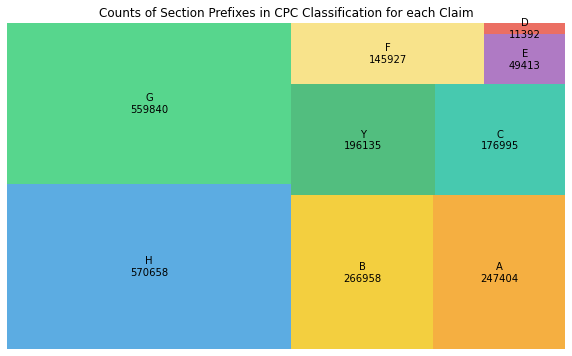

In [150]:
# define the color palette
color_palette = ['#3498db', '#2ecc71', '#f1c40f', '#f39c12', '#27ae60', '#1abc9c', '#f7dc6f', '#9b59b6', '#e74c3c']

# set the size of the figure
plt.figure(figsize=(10, 6))

# create a squarify layout for the treemap and display the count inside each rectangle
squarify.plot(sizes=df_section_prefix_counts['count'], label=[f"{i}\n{c}" for i, c in zip(df_section_prefix_counts.index, df_section_prefix_counts['count'])], alpha=.8, color=color_palette)
plt.title("Counts of Section Prefixes in CPC Classification for each Claim")
plt.axis('off')

# display the treemap
plt.show()

In [151]:
for prefix, count in section_prefix_counts.items():
    print(f"Section {prefix} count: {count}")

Section C count: 176995
Section G count: 559840
Section H count: 570658
Section Y count: 196135
Section F count: 145927
Section B count: 266958
Section A count: 247404
Section E count: 49413
Section D count: 11392


# caculate the lenght of claim

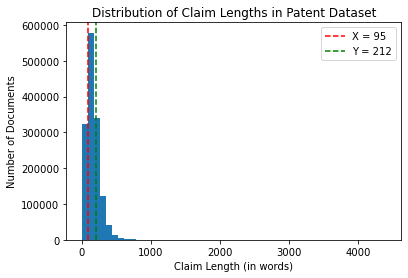

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate the length of each claim and add it as a new column in the dataframe
df_claim['claim_length'] = df_claim['Claim'].apply(lambda x: len(x.split()))

# calculate summary statistics of claim lengths
summary_stats = df_claim['claim_length'].describe()

# extract the values of X and Y
X = int(summary_stats['25%'])
Y = int(summary_stats['75%'])

# create histogram of claim lengths with X and Y labeled
plt.hist(df_claim['claim_length'], bins=50)
plt.axvline(x=X, color='red', linestyle='--', label=f'X = {X}')
plt.axvline(x=Y, color='green', linestyle='--', label=f'Y = {Y}')
plt.xlabel('Claim Length (in words)')
plt.ylabel('Number of Documents')
plt.title('Distribution of Claim Lengths in Patent Dataset')
plt.legend()
plt.show()

# filter the dataset base on secttion H

In [162]:
df_claim_filter = df_claim[df_claim['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
len(df_claim_filter)

570658

In [163]:
df_claim_filter.head()

,ID,Title,Claim,cpc_subclass,claim_length
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",184
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",214
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",168
6,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",148
7,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",109


C:\Users\admin\AppData\Local\Temp/ipykernel_23752/2730942506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_filter['claim_length'] = df_claim_filter['Claim'].apply(lambda x: len(x.split()))


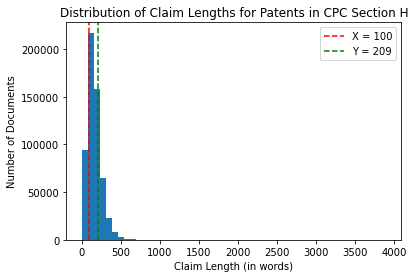

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate the length of each claim and add it as a new column in the dataframe
df_claim_filter['claim_length'] = df_claim_filter['Claim'].apply(lambda x: len(x.split()))

# calculate summary statistics of claim lengths
summary_stats = df_claim_filter['claim_length'].describe()

# extract the values of X and Y
X = int(summary_stats['25%'])
Y = int(summary_stats['75%'])

# create histogram of claim lengths with X and Y labeled
plt.hist(df_claim_filter['claim_length'], bins=50)
plt.axvline(x=X, color='red', linestyle='--', label=f'X = {X}')
plt.axvline(x=Y, color='green', linestyle='--', label=f'Y = {Y}')
plt.xlabel('Claim Length (in words)')
plt.ylabel('Number of Documents')
plt.title('Distribution of Claim Lengths for Patents in CPC Section H')
plt.legend()
plt.show()

# Abstract Dataset

In [166]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/AbstractDataset/df-Abstract.csv')
df = df.rename(columns={'No': 'ID', 'Title': 'Title', 'Abstract': 'Abstract', 'Subclass_labels': 'cpc_subclass'})
df_Abstract=df[["ID","Title","Abstract","cpc_subclass"]]
df_Abstract= df_Abstract.dropna()
df_Abstract = df_Abstract.reset_index(drop=True)
df_Abstract.head(20)

,ID,Title,Abstract,cpc_subclass
0,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,['G11B']
1,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,['A41D']
2,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,['A41D']
3,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,['A63B']
4,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,['E03D']
5,US06981286,hidden mounting of water valve body and headwo...,a water valve assembly is disclosed for mounti...,['E03C']
6,US06981287,inflatable bed unit,an inflatable bed unit includes an inflatable ...,['A47C']
7,US06981288,structure of a pillow,a pillow includes a main support part two seco...,['A47G']
8,US06981289,change aids for external articles,an external change aid having engaging means w...,"['A47B', 'A47C', 'B68G']"
9,US06981290,wire cutter and bayonet sheath combination,the present invention provides a scabbard for ...,['B26B']


In [167]:
len(df_Abstract)

2000111

In [168]:
# Remove square brackets and '' from CPC subclasses
df_Abstract['cpc_subclass'] = df_Abstract['cpc_subclass'].str.replace('[\[\]]', '').str.replace("'", "")
df_Abstract

C:\Users\admin\AppData\Local\Temp/ipykernel_23752/1975334883.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Abstract['cpc_subclass'] = df_Abstract['cpc_subclass'].str.replace('[\[\]]', '').str.replace("'", "")


,ID,Title,Abstract,cpc_subclass
0,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,G11B
1,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,A41D
2,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,A41D
3,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,A63B
4,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,E03D
...,...,...,...,...
2000106,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"G09G, G03B, H01S, H04N"
2000107,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"H05K, H01R"
2000108,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"H04J, G01R"
2000109,US08977126,unified network management of hybrid fiber coa...,embodiments enable a network operator to use a...,"H04Q, H04B, H04L"


# caculate the count of each section for each document

In [169]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt

# dictionary to store the counts for each section prefix
section_prefix_counts = {}

# loop over the subclasses in the dataset
for subclasses in df_Abstract['cpc_subclass'].str.split(","):
    # create a set to store unique section prefixes for each document
    unique_sections = set()
    for subclass in subclasses:
        subclass = subclass.strip()  # remove leading/trailing whitespaces
        if not subclass:  # skip empty subclasses
            continue
        # extract the section prefix from the subclass
        section_prefix = subclass.split()[0][0]
        # add the section prefix to the set
        unique_sections.add(section_prefix)
    # loop over the set and increment the count for each section prefix
    for section_prefix in unique_sections:
        if section_prefix in section_prefix_counts:
            section_prefix_counts[section_prefix] += 1
        else:
            section_prefix_counts[section_prefix] = 1

# create a dataframe from the section prefix counts dictionary
df_section_prefix_counts = pd.DataFrame.from_dict(section_prefix_counts, orient='index', columns=['count'])
# sort the dataframe by count in descending order
df_section_prefix_counts = df_section_prefix_counts.sort_values('count', ascending=False)


In [170]:
for prefix, count in section_prefix_counts.items():
    print(f"Section {prefix} count: {count}")

Section G count: 713719
Section A count: 292708
Section E count: 46933
Section B count: 289190
Section D count: 12495
Section H count: 595466
Section F count: 137137
Section C count: 204885


In [171]:
#draw the Treemap for each section

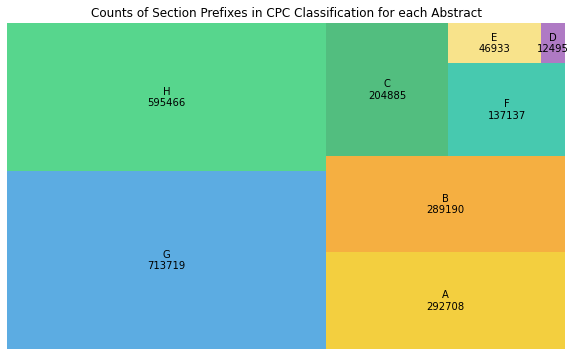

In [172]:
# define the color palette
color_palette = ['#3498db', '#2ecc71', '#f1c40f', '#f39c12', '#27ae60', '#1abc9c', '#f7dc6f', '#9b59b6', '#e74c3c']

# set the size of the figure
plt.figure(figsize=(10, 6))

# create a squarify layout for the treemap and display the count inside each rectangle
squarify.plot(sizes=df_section_prefix_counts['count'], label=[f"{i}\n{c}" for i, c in zip(df_section_prefix_counts.index, df_section_prefix_counts['count'])], alpha=.8, color=color_palette)
plt.title("Counts of Section Prefixes in CPC Classification for each Abstract")
plt.axis('off')

# display the treemap
plt.show()

# caculate the lenght of Abstract

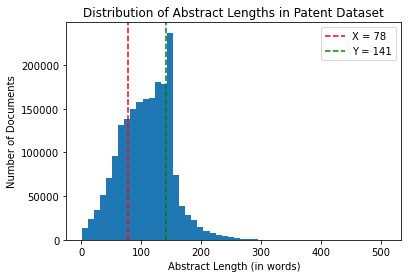

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate the length of each Abstract and add it as a new column in the dataframe
df_Abstract['Abstract_length'] = df_Abstract['Abstract'].apply(lambda x: len(x.split()))

# calculate summary statistics of Abstract lengths
summary_stats = df_Abstract['Abstract_length'].describe()

# extract the values of X and Y
X = int(summary_stats['25%'])
Y = int(summary_stats['75%'])

# create histogram of Abstract lengths with X and Y labeled
plt.hist(df_Abstract['Abstract_length'], bins=50)
plt.axvline(x=X, color='red', linestyle='--', label=f'X = {X}')
plt.axvline(x=Y, color='green', linestyle='--', label=f'Y = {Y}')
plt.xlabel('Abstract Length (in words)')
plt.ylabel('Number of Documents')
plt.title('Distribution of Abstract Lengths in Patent Dataset')
plt.legend()
plt.show()

# filter the dataset base on secttion H

In [175]:
df_Abstract_filter = df_Abstract[df_Abstract['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
len(df_Abstract_filter)

595466

In [176]:
df_Abstract_filter.head()

,ID,Title,Abstract,cpc_subclass,Abstract_length
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,H01L,118
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"H05B, A43B",102
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,H01S,135
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,H02K,269
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,H02K,118


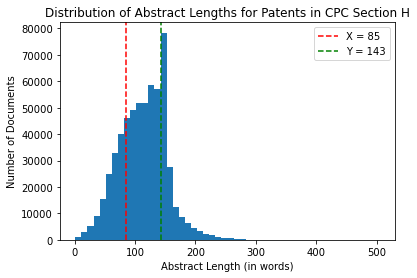

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate summary statistics of claim lengths
summary_stats = df_Abstract_filter['Abstract_length'].describe()

# extract the values of X and Y
X = int(summary_stats['25%'])
Y = int(summary_stats['75%'])

# create histogram of claim lengths with X and Y labeled
plt.hist(df_Abstract_filter['Abstract_length'], bins=50)
plt.axvline(x=X, color='red', linestyle='--', label=f'X = {X}')
plt.axvline(x=Y, color='green', linestyle='--', label=f'Y = {Y}')
plt.xlabel('Abstract Length (in words)')
plt.ylabel('Number of Documents')
plt.title('Distribution of Abstract Lengths for Patents in CPC Section H')
plt.legend()
plt.show()

In [113]:
#################################################################################################

In [42]:
# # get the unique values in the "cpc_subclass" column
# unique_subclasses = df_claim["cpc_subclass"].unique()

# # print the unique subclasses as a list
# print(unique_subclasses.tolist())

In [70]:
df_claim["cpc_subclass"].head(20)

0     C07H,C07K,C12N,C12Q,G01N
1                    G06Q,H04N
2     H04L,H04M,H04Q,H04W,H05K
3               F02D,F02P,Y02T
4               B82Y,G11C,H01L
5                    A61B,G08B
6               A63F,G06F,H04N
7                    G06F,H04L
8          A61F,A61L,C08L,G02C
9                    G05F,H03K
10              H04L,H04Q,H04W
11                        A61B
12         H03D,H03F,H04B,H04L
13              C07H,C12Q,G16B
14                        C07D
15                        E06B
16                   B60Q,B60R
17                        H04M
18                        E01F
19              G06F,G06Q,G07F
Name: cpc_subclass, dtype: object

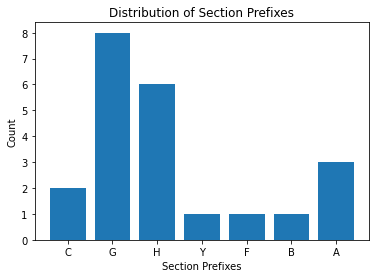

In [15]:
# # dictionary to store the counts for each section prefix
# section_prefix_counts = {}

# # loop over the subclasses in the dataset
# for subclasses in df_claim.head(10)['cpc_subclass'].str.split(","):
#     # create a set to store unique section prefixes for each document
#     unique_sections = set()
#     for subclass in subclasses:
#         # extract the section prefix from the subclass
#         section_prefix = subclass.split()[0][0]
#         # add the section prefix to the set
#         unique_sections.add(section_prefix)
#     # loop over the set and increment the count for each section prefix
#     for section_prefix in unique_sections:
#         if section_prefix in section_prefix_counts:
#             section_prefix_counts[section_prefix] += 1
#         else:
#             section_prefix_counts[section_prefix] = 1

# # create a bar chart
# plt.bar(range(len(section_prefix_counts)), list(section_prefix_counts.values()), align='center')
# plt.xticks(range(len(section_prefix_counts)), list(section_prefix_counts.keys()))

# # set chart title and axis labels
# plt.title("Distribution of Section Prefixes")
# plt.xlabel("Section Prefixes")
# plt.ylabel("Count")

# # display the chart
# plt.show()

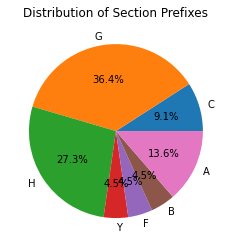

In [26]:
# # create a pie chart
# labels = list(section_prefix_counts.keys())
# sizes = list(section_prefix_counts.values())
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# # set chart title
# plt.title("Distribution of Section Prefixes")

# # display the chart
# plt.show()

In [19]:
# !pip install squarify


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# for section_prefix in section_prefix_counts:
#     print(f"Section {section_prefix} count: {section_prefix_counts[section_prefix]}")

In [79]:
#Abstract dataset